<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Exercises_XP_W4D4_Data_Preprocessing_%26_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Duplicate Detection And Removal

In [ ]:
! kaggle datasets download -d brendan45774/test-file

In [1]:
import pandas as pd

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()


In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip test-file.zip

In [85]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv('tested.csv')

# Display the first few rows of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are removed
print(df.duplicated().sum())

Exercise 2: Handling Missing Values

In [9]:
# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())

# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)
len(df)

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False   True     False  
2  False   True     False  
3  False   True     False  
4  False   True     False  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


418

In [ ]:
# Save the number of rows before deletion
rows_before_deletion = df.shape[0]

# Remove rows with missing values
df_cleaned = df.dropna(subset=['Cabin'])

# Save the number of rows after deletion
rows_after_deletion = df_cleaned.shape[0]

# Calculate the number of rows deleted
rows_deleted = rows_before_deletion - rows_after_deletion

print(rows_deleted)

missing_counts = df_cleaned.isnull().sum()
print(missing_counts)

In [ ]:
# Fill missing values with the mean of the column
df_filled = df.fillna(df['Age'].mean())
missing_counts = df_filled.isnull().sum()
print(missing_counts)

In [ ]:
from sklearn.impute import KNNImputer
# Separate numeric and categorical columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values for the entire DataFrame
df_imputed = imputer.fit_transform(df_encoded)

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

# Count missing values after imputation
missing_counts = df_imputed.isnull().sum()
print(missing_counts)

Exercise 3: Feature Engineering

In [ ]:
# split the Name column into two columns using pd.Series.str.split()
df[['Last Name', 'First Name']] = df['Name'].str.split(',', expand=True)

# view the updated DataFrame
print(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
print(df)

Exercise 4: Outlier Detection And Handling

In [41]:
# Identify and handle outliers in 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_data = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

66.9063


In [ ]:
# Identify and handle outliers in 'Fare' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_data = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


<Axes: ylabel='Fare'>

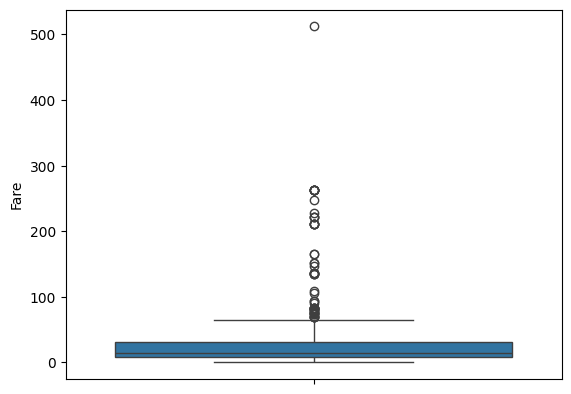

In [86]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Fare'])

In [87]:
outliers = df[(df['Fare'] <= lower_bound) | (df['Fare'] >= upper_bound)]
print('The following are the outliers in the boxplot: ')
print(outliers['Fare'])

The following are the outliers in the boxplot: 
12      82.2667
24     262.3750
48      76.2917
53     263.0000
59     262.3750
64     262.3750
69     263.0000
74     211.5000
75     211.5000
81     221.7792
96      78.8500
114    221.7792
118     75.2417
141    151.5500
142    262.3750
150     83.1583
156    221.7792
179     83.1583
181     83.1583
184    247.5208
188     69.5500
196    134.5000
202    227.5250
212     73.5000
217    164.8667
218    211.5000
234     71.2833
236     75.2500
239    106.4250
242    134.5000
252    136.7792
270     75.2417
272    136.7792
287     82.2667
293     81.8583
306    151.5500
308     93.5000
314    135.6333
316    146.5208
324    211.3375
327     79.2000
342     69.5500
343    512.3292
352     73.5000
360     69.5500
365     69.5500
371    134.5000
374     81.8583
375    262.3750
390     93.5000
397     79.2000
400    164.8667
407    211.5000
411     90.0000
414    108.9000
Name: Fare, dtype: float64


418
363


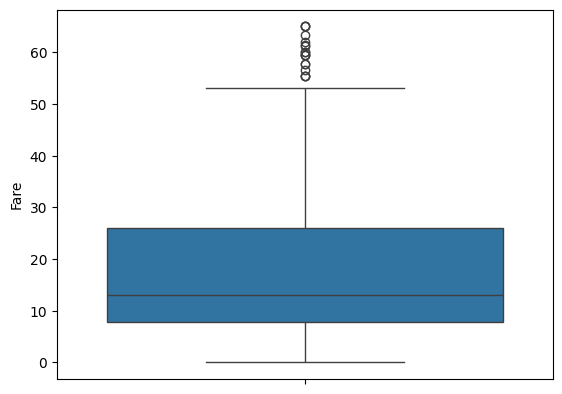

In [88]:
# Before DataFrame
print(len(df))

# Drop rows containing outliers from the original DataFrame
df = df.drop(outliers.index)
sns.boxplot(df['Fare'])

# After DataFrame
print(len(df))


Exercise 5: Data Standardization And Normalization


In [67]:
# Get summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats['Age'])

count    330.000000
mean      30.022727
std       13.849584
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       64.000000
Name: Age, dtype: float64


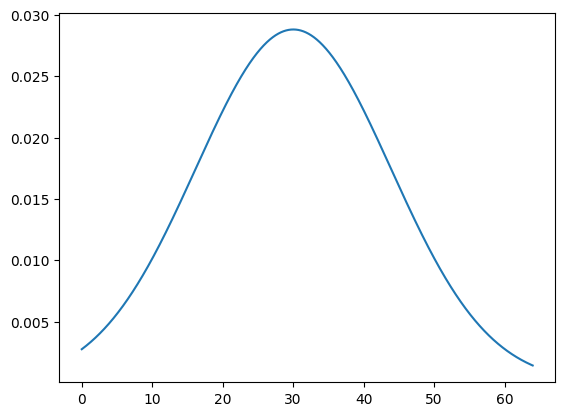

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Plot between min and max Age with .001 steps.
x_axis = np.arange(0, 64, 0.01)

# Calculating mean and standard deviation
mean = 30.022727
sd = 13.849584

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()


In [75]:
# Standarizing the data
# Z-Score
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
print (df['Age'].reset_index())

     index       Age
0        0  0.323278
1        1  1.225833
2        2  2.308898
3        3 -0.218254
4        4 -0.579276
..     ...       ...
411    413       NaN
412    414  0.648198
413    415  0.612096
414    416       NaN
415    417       NaN

[416 rows x 2 columns]


In [ ]:
#Normalizing data using min max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
print(df)

Exercise 6: Feature Encoding

In [ ]:
!pip install scikit-learn


In [83]:
# Identify categorical columns in the Titanic dataset, such as ‘Sex’ and ‘Embarked’.
# Use one-hot encoding for nominal variables and label encoding for ordinal variables.
# Integrate the encoded features back into the main dataset.

from sklearn.preprocessing import LabelEncoder

# Separate categorical columns
categorical_columns = ['Sex', 'Embarked']

# Apply one-hot encoding for nominal variables and label encoding for ordinal variables
for col in categorical_cols:
    # Check if the column is ordinal or nominal based on domain knowledge
    if col in ['Sex']:  # Assuming 'Sex' is nominal
        # One-hot encoding for nominal variables
        one_hot_encoded = pd.get_dummies(df[col], prefix=col)
        titanic_df = pd.concat([df, one_hot_encoded], axis=1)
        titanic_df.drop(col, axis=1, inplace=True)
    elif col in ['Embarked']:  # Assuming 'Embarked' is nominal
        # Label encoding for ordinal variables
        label_encoder = LabelEncoder()
        titanic_df[col] = label_encoder.fit_transform(titanic_df[col])



In [89]:
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name       Age  SibSp  Parch  \
0                              Kelly, Mr. James  0.323278      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  1.225833      1      0   
2                     Myles, Mr. Thomas Francis  2.308898      0      0   
3                              Wirz, Mr. Albert -0.218254      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist) -0.579276      1      1   

    Ticket     Fare Cabin  Embarked  Sex_female  Sex_male  
0   330911   7.8292   NaN         1           0         1  
1   363272   7.0000   NaN         2           1         0  
2   240276   9.6875   NaN         1           0         1  
3   315154   8.6625   NaN         2           0         1  
4  3101298  12.2875   NaN       

In [94]:
df['Age_category'] = pd.cut(df['Age'],bins=[0,18,40,60,90])
grouped_df = df.groupby('Age_category')['Age'].mean().reset_index()


# Merge grouped_df with df based on 'Age_category'
df = pd.merge(df, grouped_df, on='Age_category', how='left', suffixes=('', '_mean'))

# Print the merged DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked Age_category   Age_mean  
0   330911   7.8292   NaN        Q     (18, 40]  27.061453  
1   363272   7.0000   NaN        S     (40, 60]  47.244681  
2   240276   9.6875   NaN        Q     (60, 90]  62.100000  
3   315154   8.6625   NaN        S     (18, 40]  27.061453  
4  